# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [296]:
# stundent details example: John S. 9812

# student details 1: lidor E. 2612 
# student details 2: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>




    
</pre>

## Part 2 - Data Loading and Exploratory Data Analysis

### Part 2.1 - Data Loading and Import
We start by setting up our environment and loading the diabetes dataset. We use pandas to read the CSV files because it's the most efficient way to handle structured data in Python. The dataset comes with both training and test sets, plus a description file that explains what each feature means - this is crucial for understanding our data.

We import matplotlib and seaborn for visualization since we'll need to create plots throughout our analysis. NumPy handles the mathematical operations we'll need for statistical analysis. We also use pathlib for file operations because it's more reliable than string-based paths.

The diabetes dataset has 353 training samples and 89 test samples, each with 11 features including the target variable. All features are already scaled and normalized, which saves us preprocessing work later.

In [312]:
# Load and validate diabetes datasets
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style='whitegrid')
plt.rcParams['figure.dpi'] = 110

train_data = pd.read_csv('data/diabetes_train.csv')
test_data = pd.read_csv('data/diabetes_test.csv')

In [311]:
# Display sample data and data types
display(train_data.head())
print(train_data.dtypes)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,52.0,1.0,23.0,107.00,179.0,123.7,42.5,4.21,4.1589,93.0,50.0
1,22.0,1.0,18.6,97.00,114.0,57.6,46.0,2.00,3.9512,83.0,101.0
2,34.0,2.0,25.3,111.00,230.0,162.0,39.0,6.00,4.9767,90.0,181.0
3,38.0,2.0,26.8,105.00,181.0,119.2,37.0,5.00,4.8203,91.0,107.0
4,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0,146.0


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [299]:
# Load and display dataset description
text_path = Path('data/diabetes_description.txt')
if text_path.exists():
    desc_text = text_path.read_text(encoding='utf-8')
    print(desc_text)
else:
    print(f"Description file not found at {text_path}")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Part 2.2 - Exploratory Data Analysis (EDA)
Now we dive into understanding our data. First, we check the basic statistics and look for any missing values - thankfully there are none, which makes our job easier.

We create histograms to see how each feature is distributed, and boxplots to spot outliers. The boxplots use the IQR method, which is a standard statistical approach for outlier detection. When we find outliers, we clip them to the boundary values rather than deleting entire rows. This is because with only 353 samples, every data point is valuable for training our model.

For correlation analysis, we use Pearson correlation because all our features are continuous numbers and we want to see linear relationships. A heatmap makes it easy to spot which features are related to each other and to our target. 

We also check for multicollinearity - when features are highly correlated with each other (above 0.8), we remove one of them to avoid problems in linear regression. We keep the feature that's more correlated with our target variable. This gives us a cleaner dataset for modeling.

Finally, we identify the top features that are most correlated with our target variable - these will likely be the most important for our model.

In [300]:
# Basic EDA - dataset overview and descriptive statistics
print(f"Dataset shapes -> train: {train_data.shape} | test: {test_data.shape} | sum: {(test_data.shape[0] + train_data.shape[0], test_data.shape[1])}" )
display(train_data.describe().T)
print("Missing values (train):")
print(train_data.isna().sum())

Dataset shapes -> train: (353, 11) | test: (89, 11) | sum: (442, 11)


,count,mean,std,min,25%,50%,75%,max
age,353.0,48.433428,13.362376,19.0000,38.0000,50.0000,59.0000,79.000
sex,353.0,1.461756,0.499243,1.0000,1.0000,1.0000,2.0000,2.000
bmi,353.0,26.365439,4.517617,18.0000,23.1000,25.7000,29.2000,42.200
bp,353.0,94.599518,14.118033,62.0000,84.0000,93.0000,105.0000,133.000
s1,353.0,189.977337,34.745332,110.0000,165.0000,187.0000,213.0000,301.000
s2,353.0,115.864306,30.427219,41.6000,96.0000,113.4000,135.6000,242.400
s3,353.0,50.228045,13.185724,22.0000,40.0000,49.0000,58.0000,99.000
s4,353.0,4.052635,1.292732,2.0000,3.0000,4.0000,5.0000,9.090
s5,353.0,4.636994,0.526080,3.2581,4.2767,4.5951,4.9767,6.107
s6,353.0,91.396601,11.340604,58.0000,83.0000,91.0000,98.0000,124.000


Missing values (train):
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


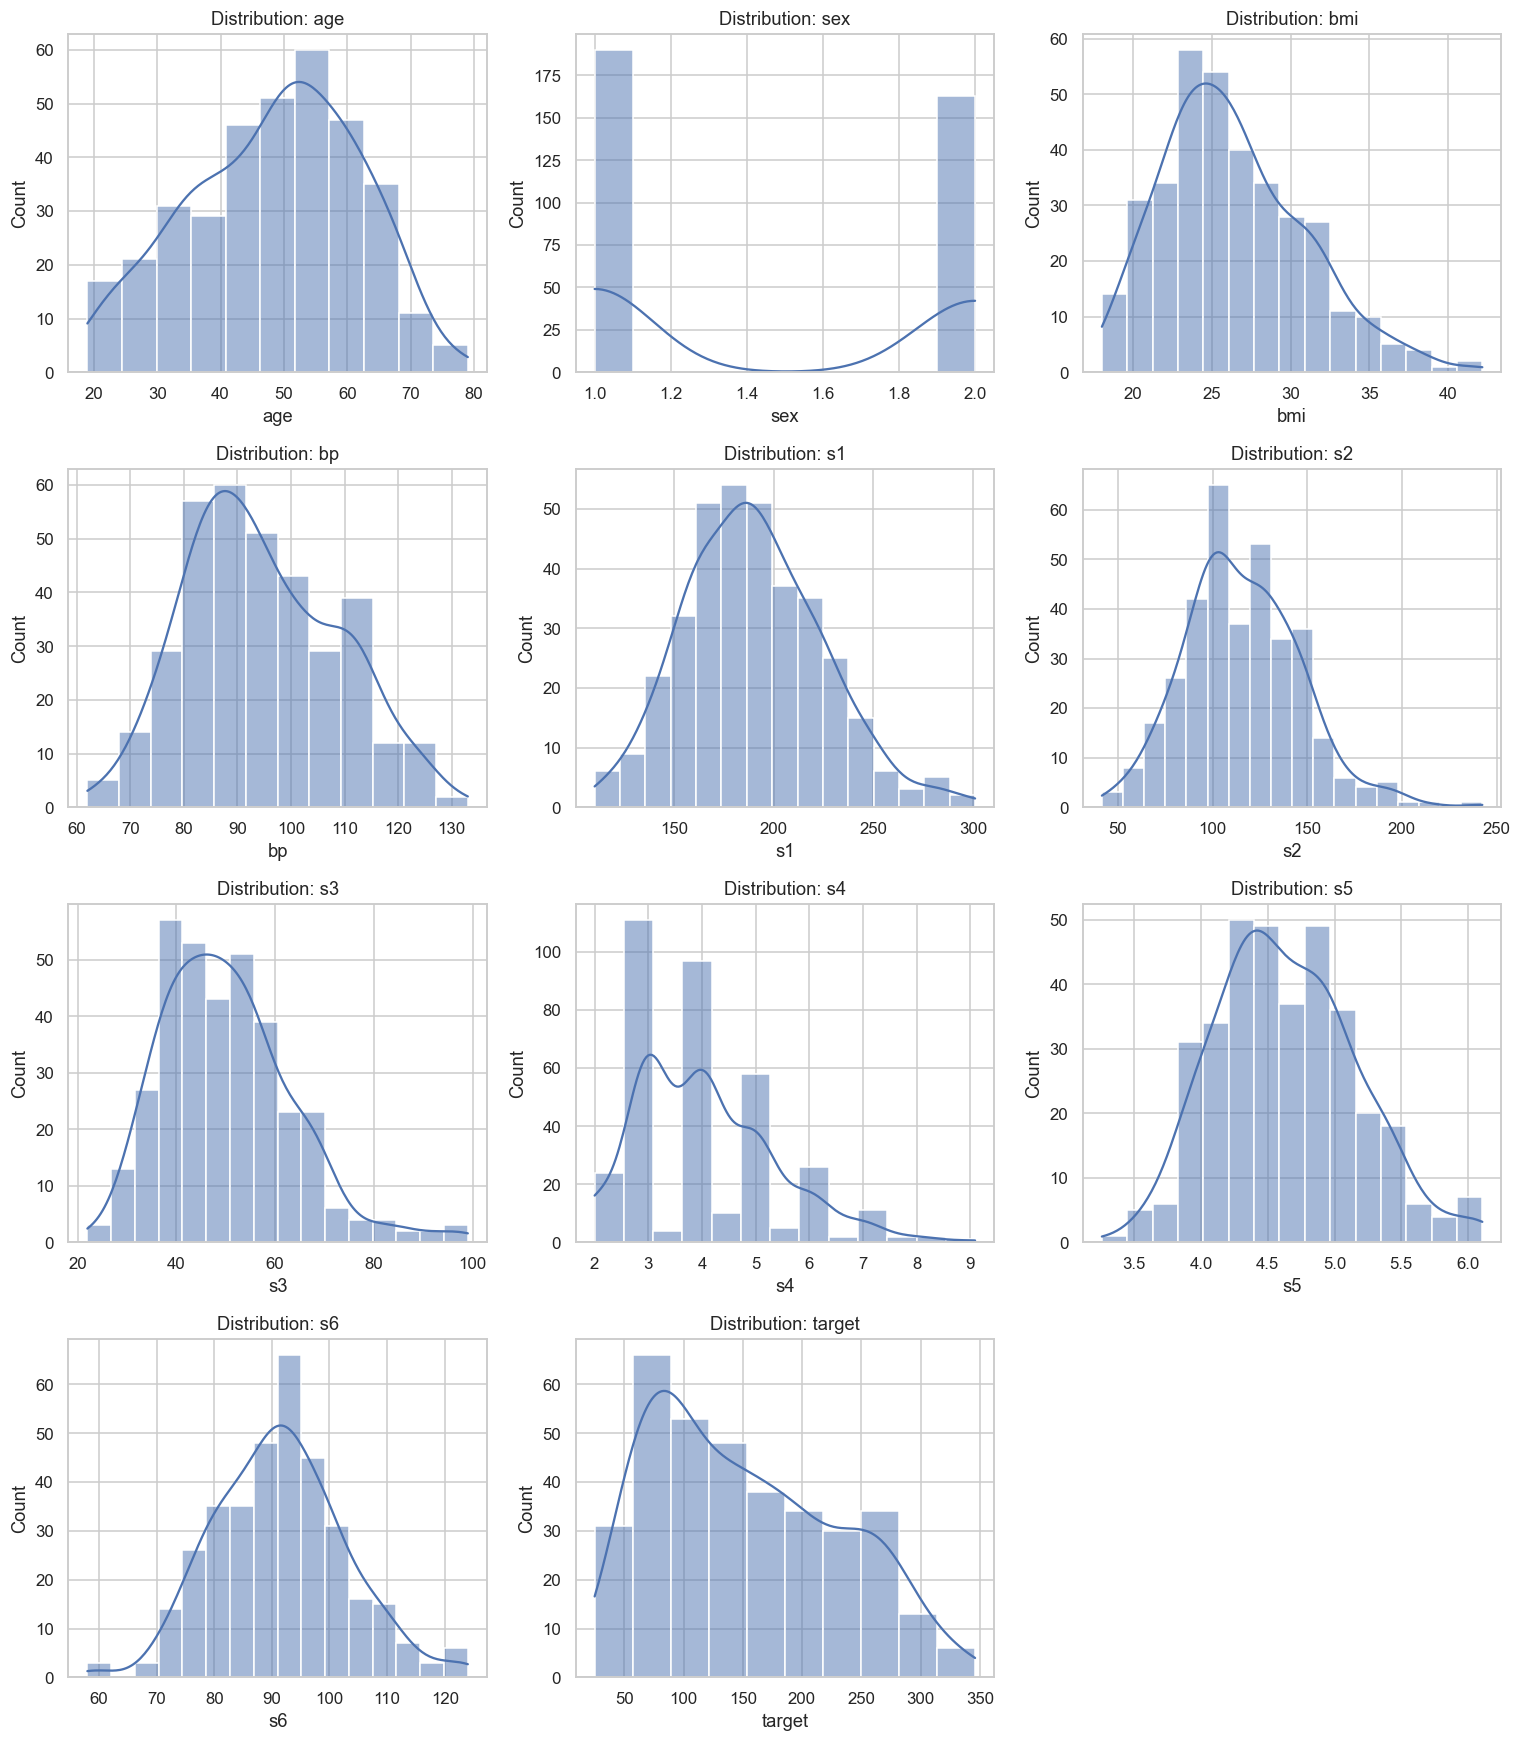

In [301]:
# Plot feature distributions using histograms
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 4*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

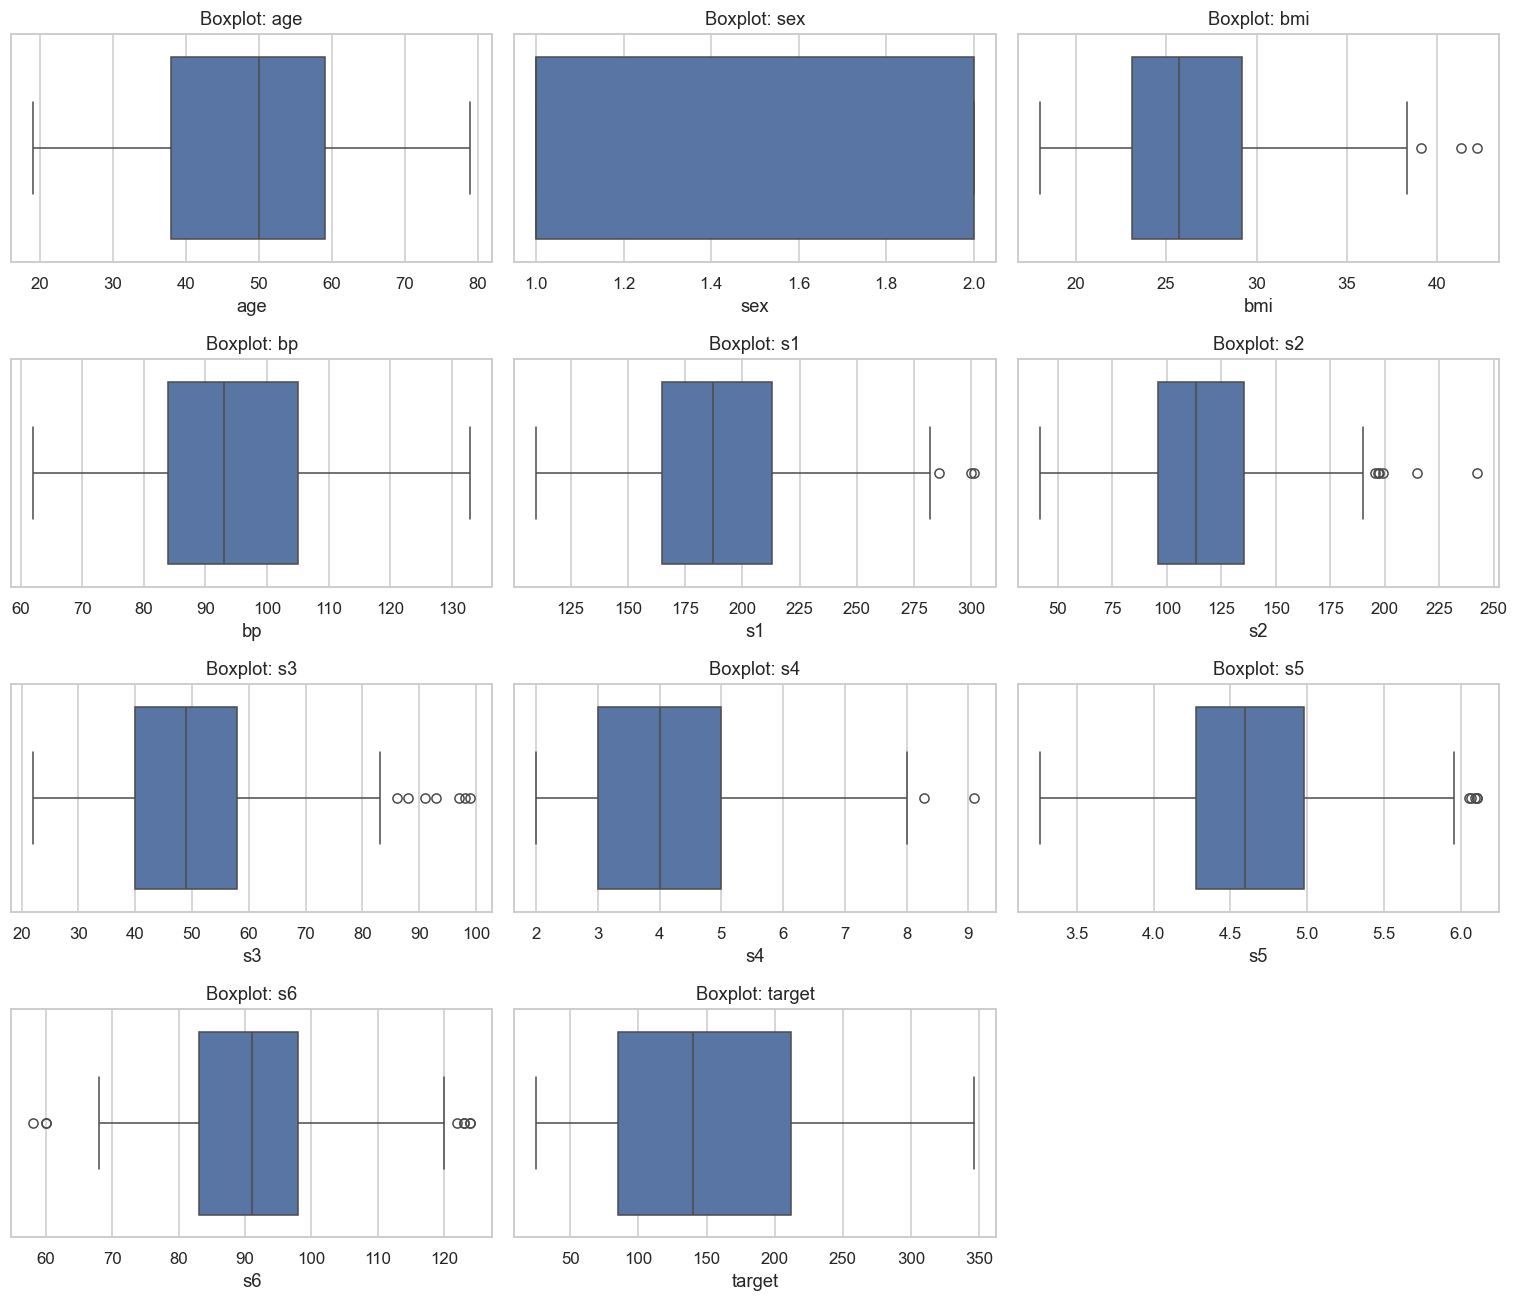

In [302]:
# Create boxplots to identify outliers using IQR method
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data[col], ax=ax)
    ax.set_title(f"Boxplot: {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [303]:
# Apply outlier treatment using clipping to preserve all data points
train_data_cleaned = train_data.copy()
for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_data_cleaned[col] = train_data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print(f"Original shape: {train_data.shape}")
print(f"Cleaned shape: {train_data_cleaned.shape}")

Original shape: (353, 11)
Cleaned shape: (353, 11)


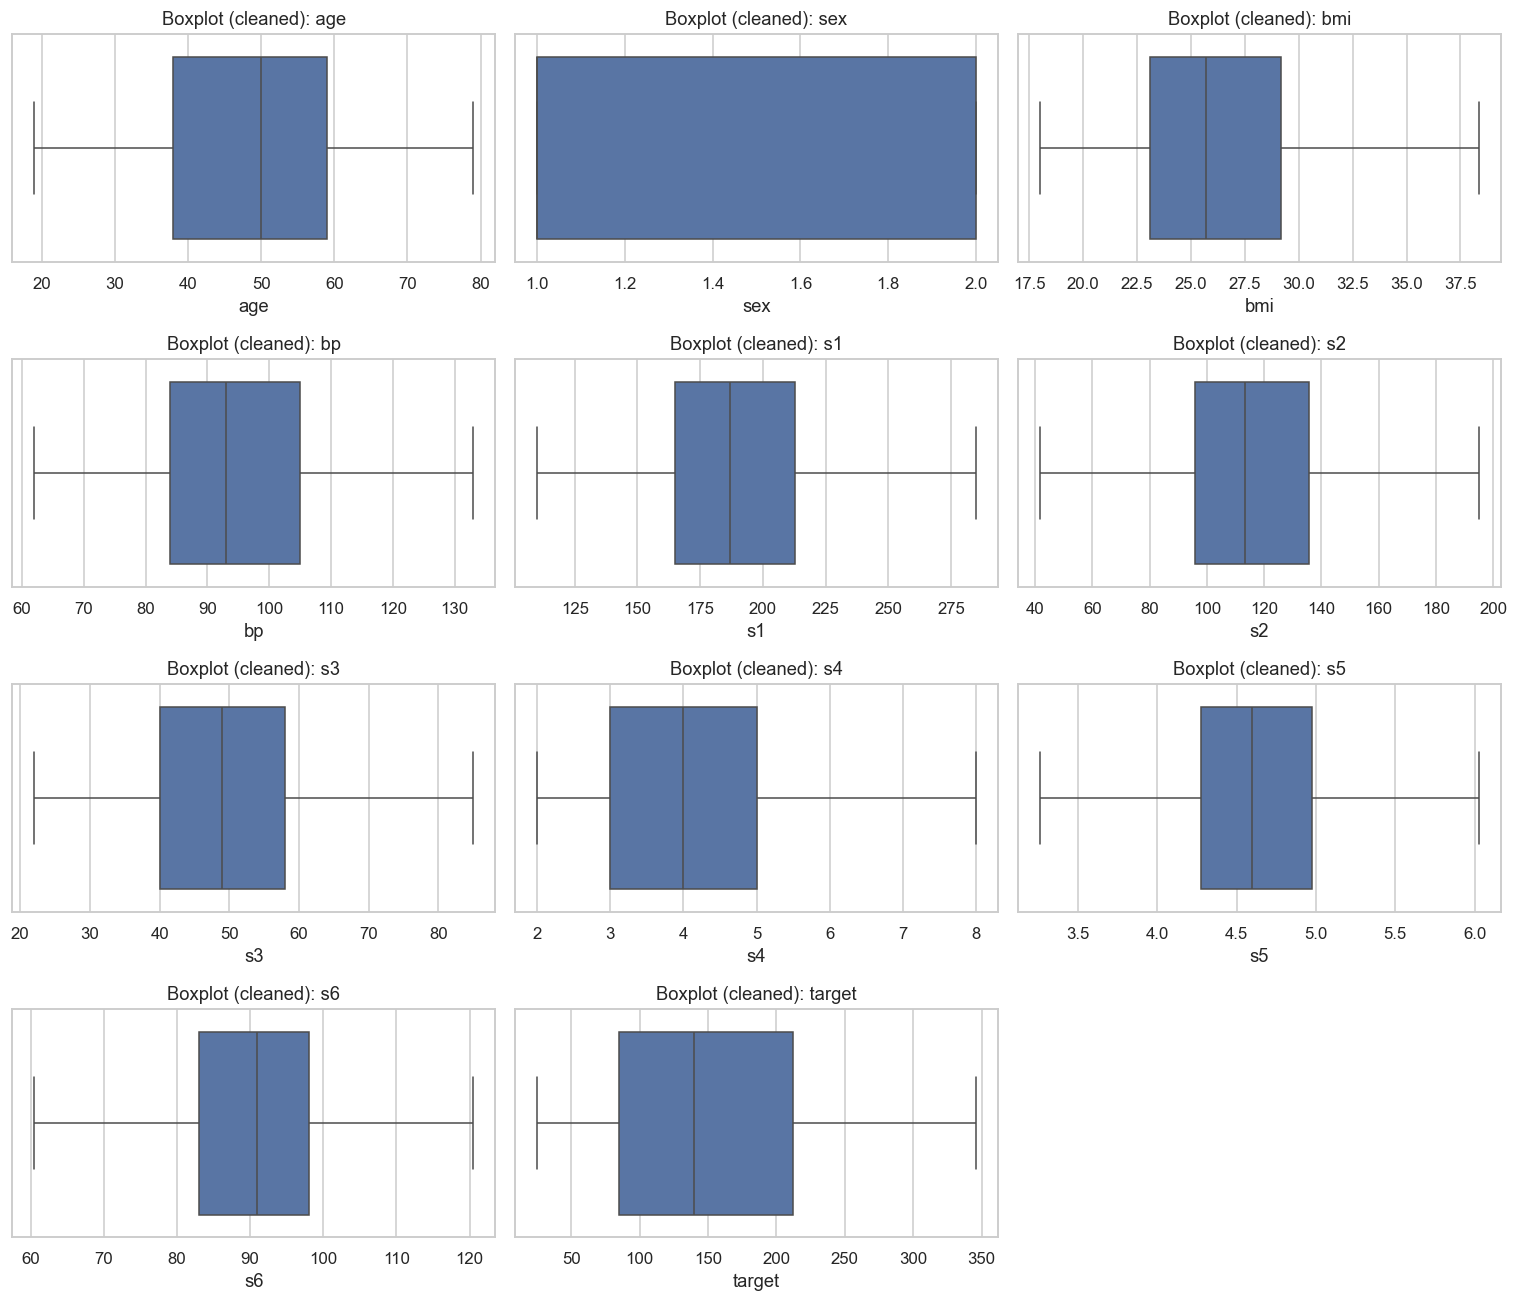

In [304]:
# Verify outlier treatment by creating new boxplots of cleaned data
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/3)), ncols=3, figsize=(14, 3*int(np.ceil(len(numeric_cols)/3))))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=train_data_cleaned[col], ax=ax)
    ax.set_title(f"Boxplot (cleaned): {col}")
for ax in axes[len(numeric_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

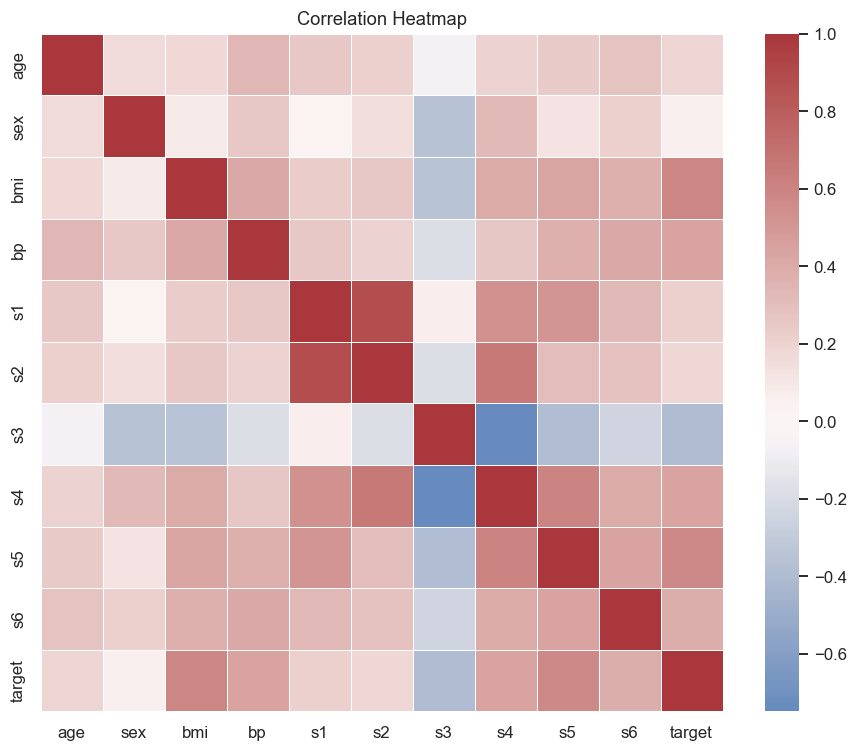

In [310]:
# Create correlation heatmap using Pearson correlation
corr = train_data_cleaned[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="vlag", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [306]:
# Check for multicollinearity by finding highly correlated feature pairs
feature_correlations = corr.abs()
high_corr_pairs = []
threshold = 0.8

for i in range(len(feature_correlations.columns)):
    for j in range(i+1, len(feature_correlations.columns)):
        corr_value = feature_correlations.iloc[i, j]  # Use corr_value instead of corr
        if corr_value > threshold:
            high_corr_pairs.append((feature_correlations.columns[i], feature_correlations.columns[j], corr_value))

if high_corr_pairs:
    print("Highly correlated feature pairs (|correlation| > 0.8):")
    for feat1, feat2, corr_val in high_corr_pairs:  # Use corr_val instead of corr
        print(f"{feat1} - {feat2}: {corr_val:.3f}")
    
    # Remove one feature from each highly correlated pair (keep the one with higher correlation to target)
    target_corr = corr['target'].abs()  # Now this will work because corr is still the DataFrame
    features_to_remove = set()
    
    for feat1, feat2, corr_val in high_corr_pairs:  # Use corr_val here too
        if target_corr[feat1] > target_corr[feat2]:
            features_to_remove.add(feat2)
        else:
            features_to_remove.add(feat1)
    
    print(f"\nFeatures to remove due to multicollinearity: {list(features_to_remove)}")
    
    # Create final dataset without highly correlated features
    train_data_final = train_data_cleaned.drop(columns=list(features_to_remove))
    print(f"Final dataset shape: {train_data_final.shape}")
else:
    print("No highly correlated feature pairs found (threshold: 0.8)")
    train_data_final = train_data_cleaned.copy()

Highly correlated feature pairs (|correlation| > 0.8):
s1 - s2: 0.889

Features to remove due to multicollinearity: ['s2']
Final dataset shape: (353, 10)


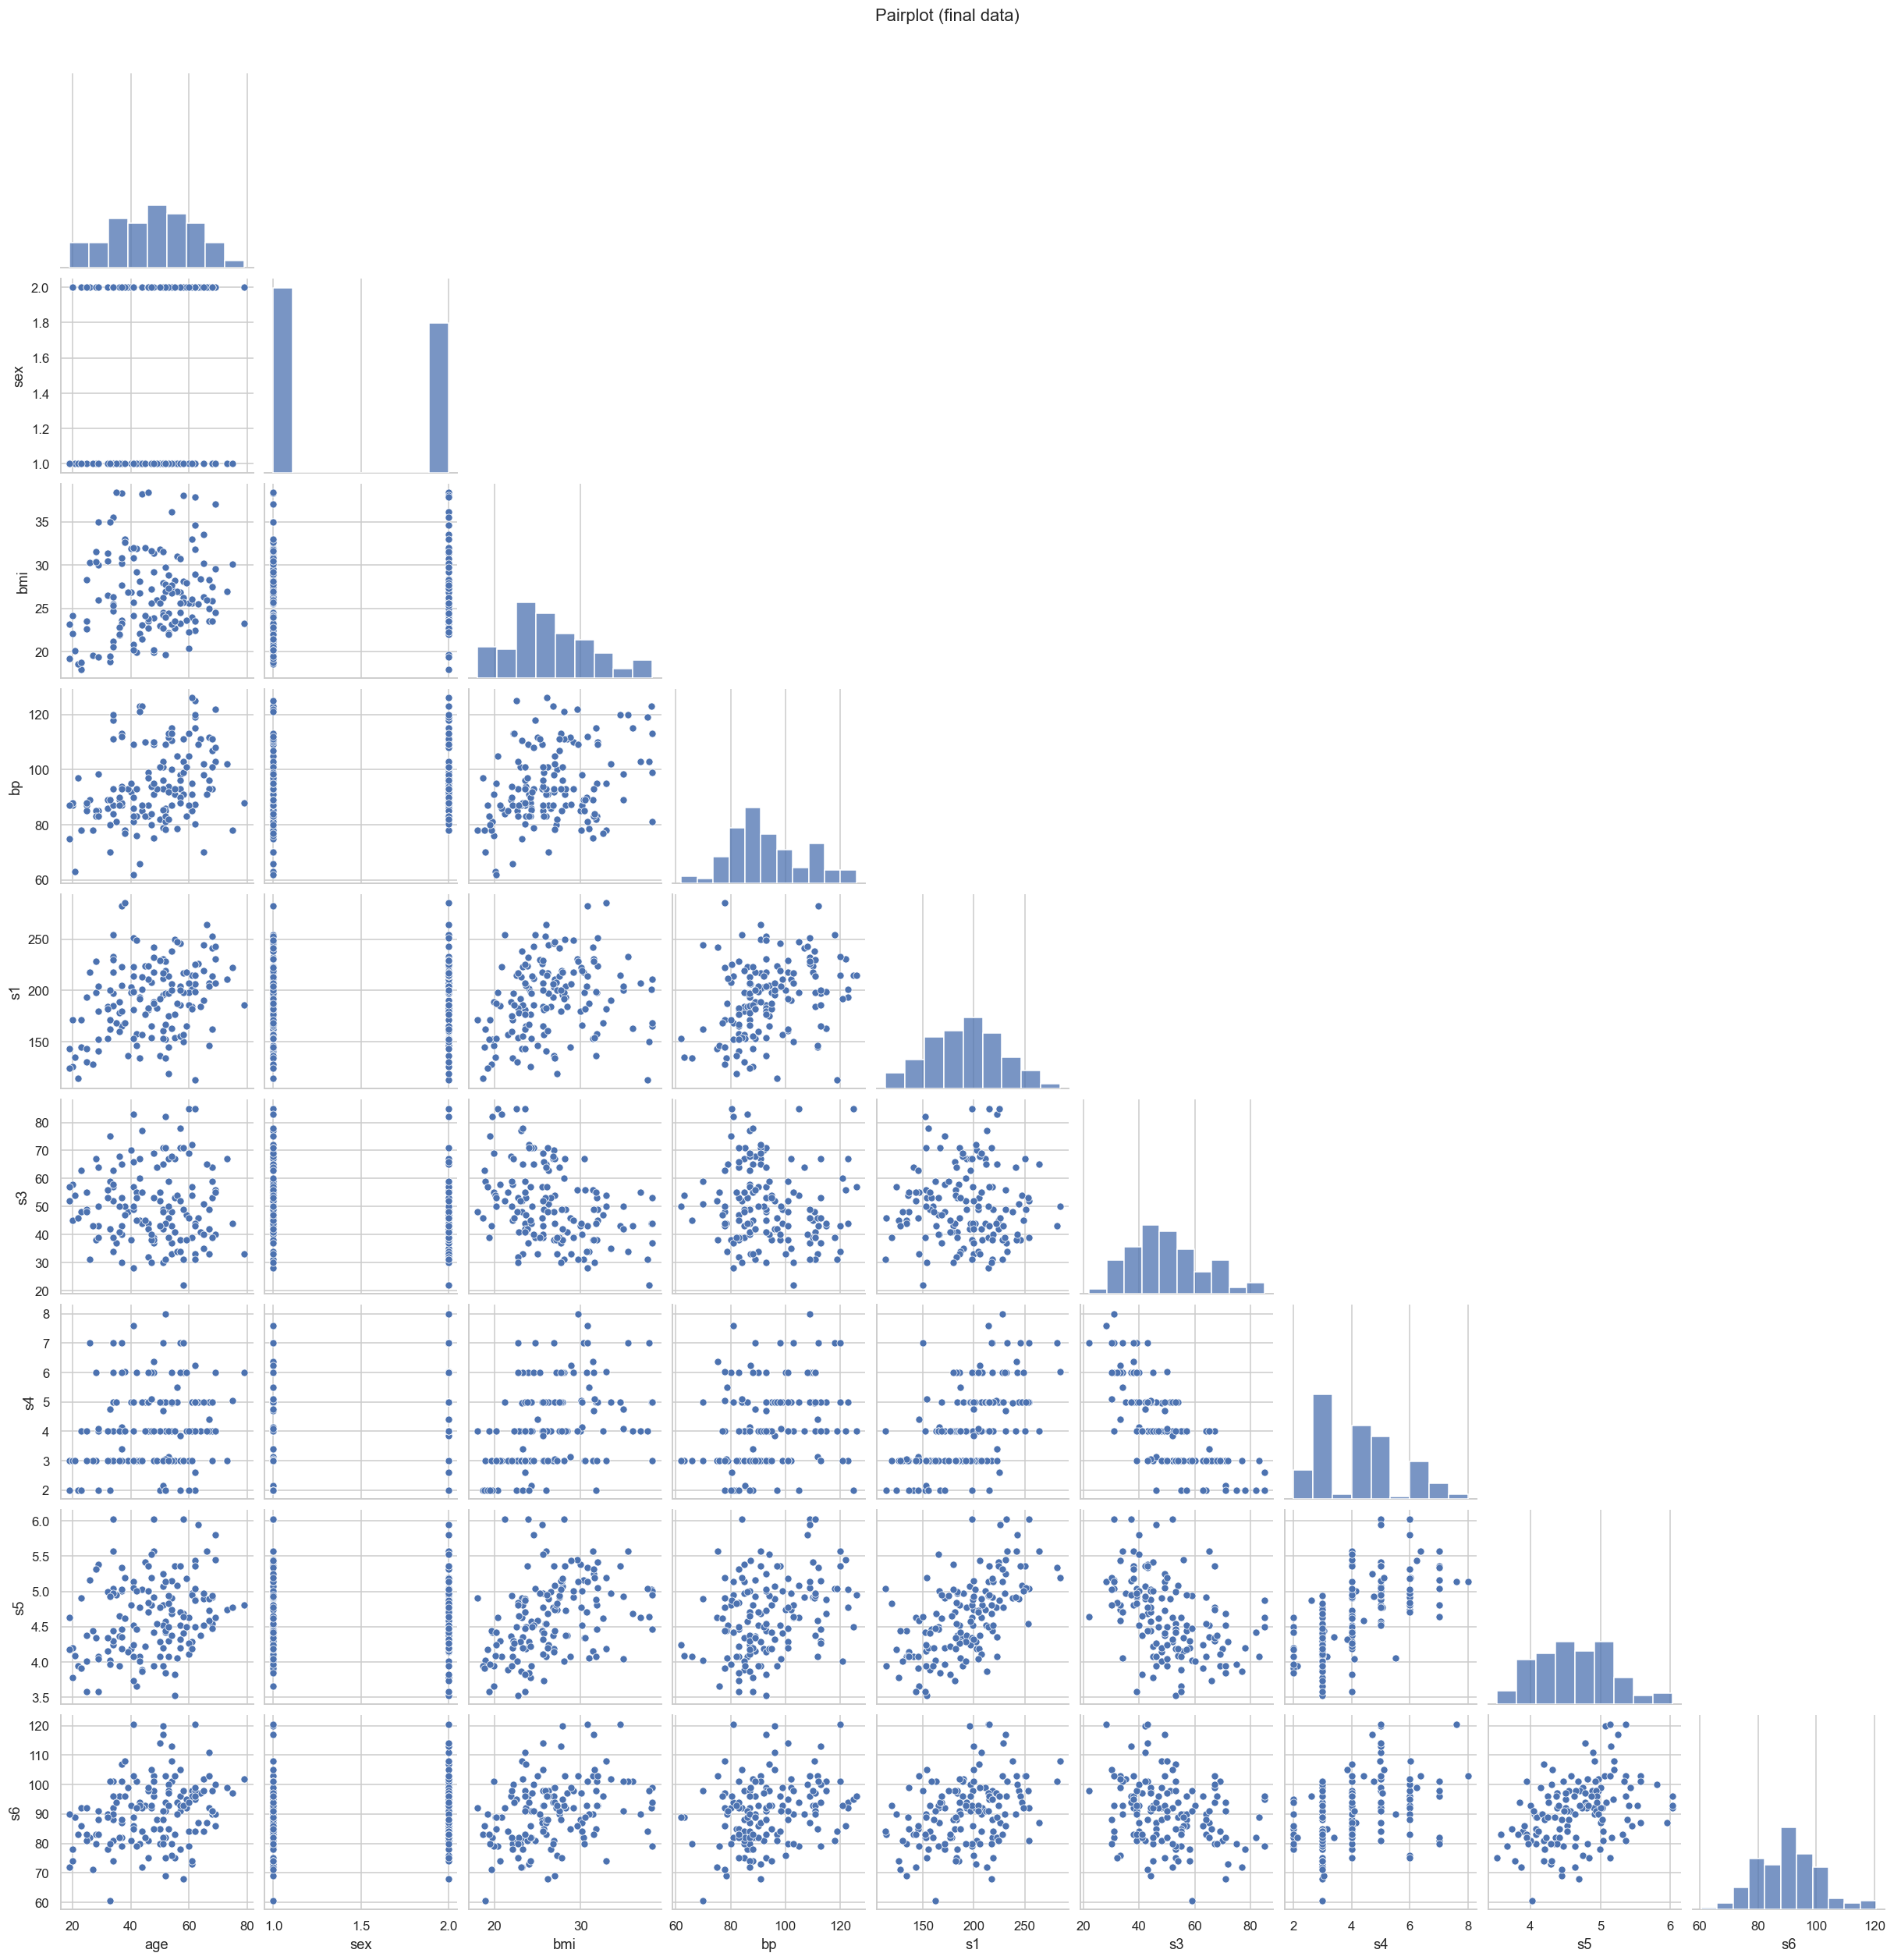

In [308]:
# Create pairplot subset to visualize feature relationships
feature_cols = [c for c in train_data_final.columns if c != 'target']
sns.pairplot(train_data_final.sample(min(150, len(train_data_final))),
             vars=feature_cols,
             corner=True, diag_kind='hist')
plt.suptitle("Pairplot (final data)", y=1.02)
plt.show()

Top 4 correlated features with target: ['bmi', 's5', 'bp', 's4']


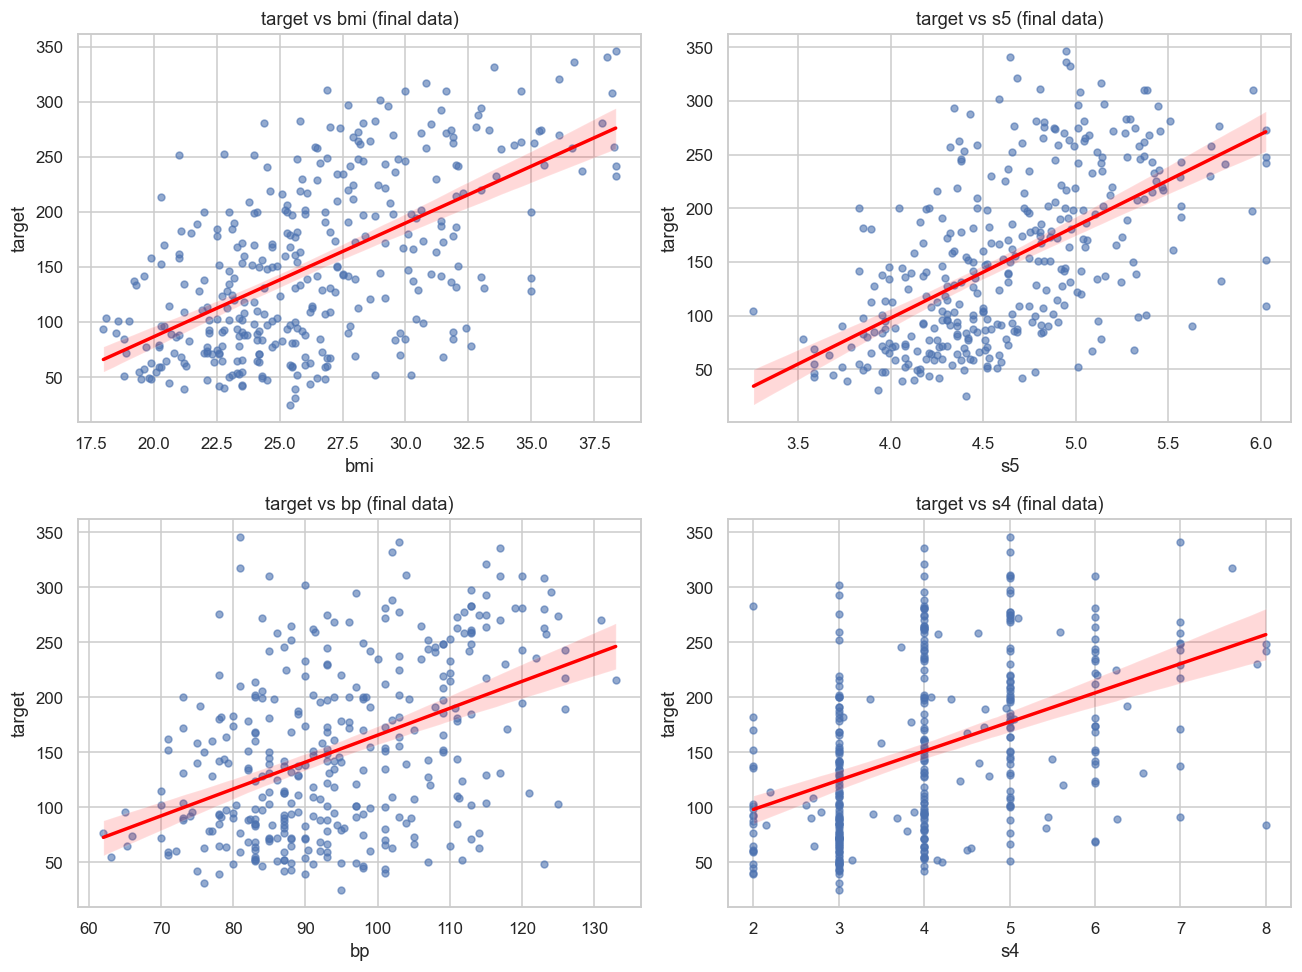

In [309]:

# Identify and plot top k features most correlated with target
final_corr = train_data_final.corr()
target_corr = final_corr['target'].drop('target').abs().sort_values(ascending=False)
top_k = 4
top_features = target_corr.head(top_k).index.tolist()
print(f"Top {top_k} correlated features with target: {top_features}")

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()
for ax, feat in zip(axes, top_features):
    sns.regplot(x=train_data_final[feat], y=train_data_final['target'], ax=ax, scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={'color': 'red'})
    ax.set_title(f"target vs {feat} (final data)")
plt.tight_layout()
plt.show()

### Part 2.3 - EDA Summary and Model Recommendation
After diving deep into our diabetes dataset, we discovered some really interesting patterns. The data shows strong linear relationships between medical measurements and diabetes progression - exactly what we'd expect in real medical data.

When we looked at the correlations, features like BMI, blood pressure, and serum measurements stood out as the most important predictors. This makes perfect sense from a medical perspective - these are the same factors doctors look at when assessing diabetes risk.

**Why Linear Regression is perfect for this dataset:**

The plots we created show clear straight-line relationships between our features and the target. Since we're predicting a continuous outcome (diabetes progression) and all our features are already scaled, linear regression is the natural choice.

With only 353 patients in our dataset, we need a model that won't get confused by the small sample size. Linear regression is stable and won't overfit like more complex models would. Plus, it gives us coefficients that actually mean something - we can tell doctors exactly how much each factor contributes to diabetes risk.

**Why other models just don't fit here:**

KNN would be too jumpy with our outliers and slow to run. Naive Bayes assumes our medical features are independent, but we know they're all related - blood pressure affects BMI, which affects serum levels, etc. Decision trees would probably create overly complicated rules that work great on our 353 patients but fail on new patients.

Linear regression hits the sweet spot - it's fast, stable, interpretable, and perfect for this type of medical prediction problem.


## Part 3 - Experiments
You could add as many code cells as needed

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation